# NUTS (Nomenclature of territorial units for statistics)

<https://ec.europa.eu/eurostat/web/gisco/geodata/reference-data/administrative-units-statistical-units/nuts>

In [3]:
# import libraries
import os
from datetime import datetime, timezone
from zipfile import BadZipFile, ZipFile
import geopandas as gpd
import matplotlib.pyplot as plt
import pooch

In [30]:
# base data download directory
SUB_DIR = os.path.join("data", "boundaries", "NUTS2021")
os.makedirs(SUB_DIR, exist_ok=True)

URL = (
    "https://gisco-services.ec.europa.eu/distribution/v2/nuts/download/"
    "ref-nuts-2021-01m.shp.zip"
)
KNOWN_HASH = None
FILE_NAME = "ref-nuts-2021-01m.shp.zip"

# file name for the GeoPackage where the boundary vector layers will be saved
GPKG_BOUNDARY = os.path.join("data", "boundaries", "ref-nuts-2021-01m.gpkg")

DATA_DIR_TEMP = os.path.join(SUB_DIR, "temp")

os.makedirs(DATA_DIR_TEMP, exist_ok=True)

DATA_FILE = os.path.join(SUB_DIR, FILE_NAME)

In [5]:
# download data if necessary
if not os.path.isfile(os.path.join(SUB_DIR, FILE_NAME)):
    pooch.retrieve(
        url=URL,
        known_hash=KNOWN_HASH,
        fname=FILE_NAME,
        path=SUB_DIR
    )

    with open(
        os.path.join(SUB_DIR, f"{FILE_NAME[:-8]}.txt"), "w", encoding="utf-8"
    ) as outfile:
        outfile.write(
            f"Data downloaded on: {datetime.now(tz=timezone.utc)}\n"
            f"Download URL: {URL}"
        )

SHA256 hash of downloaded file: 4d51d3778405a528573707d8318bf1cbfd1b0386a2fa69873524c2e6420f740b
Use this value as the 'known_hash' argument of 'pooch.retrieve' to ensure that the file hasn't changed if it is downloaded again in the future.


In [7]:
ZipFile(DATA_FILE).namelist()

['NUTS_RG_01M_2021_3035.shp.zip',
 'NUTS_RG_01M_2021_3035_LEVL_0.shp.zip',
 'NUTS_RG_01M_2021_3035_LEVL_1.shp.zip',
 'NUTS_RG_01M_2021_3035_LEVL_2.shp.zip',
 'NUTS_RG_01M_2021_3035_LEVL_3.shp.zip',
 'NUTS_RG_01M_2021_3857.shp.zip',
 'NUTS_RG_01M_2021_3857_LEVL_0.shp.zip',
 'NUTS_RG_01M_2021_3857_LEVL_1.shp.zip',
 'NUTS_RG_01M_2021_3857_LEVL_2.shp.zip',
 'NUTS_RG_01M_2021_3857_LEVL_3.shp.zip',
 'NUTS_RG_01M_2021_4326.shp.zip',
 'NUTS_RG_01M_2021_4326_LEVL_0.shp.zip',
 'NUTS_RG_01M_2021_4326_LEVL_1.shp.zip',
 'NUTS_RG_01M_2021_4326_LEVL_2.shp.zip',
 'NUTS_RG_01M_2021_4326_LEVL_3.shp.zip',
 'NUTS_LB_2021_3035.shp.zip',
 'NUTS_LB_2021_3035_LEVL_0.shp.zip',
 'NUTS_LB_2021_3035_LEVL_1.shp.zip',
 'NUTS_LB_2021_3035_LEVL_2.shp.zip',
 'NUTS_LB_2021_3035_LEVL_3.shp.zip',
 'NUTS_LB_2021_3857.shp.zip',
 'NUTS_LB_2021_3857_LEVL_0.shp.zip',
 'NUTS_LB_2021_3857_LEVL_1.shp.zip',
 'NUTS_LB_2021_3857_LEVL_2.shp.zip',
 'NUTS_LB_2021_3857_LEVL_3.shp.zip',
 'NUTS_LB_2021_4326.shp.zip',
 'NUTS_LB_2021_4326_

In [8]:
# extract the archive
try:
    z = ZipFile(DATA_FILE)
    z.extractall(DATA_DIR_TEMP)
except BadZipFile:
    print("There were issues with the file", DATA_FILE)

In [9]:
DATA_FILE = os.path.join(DATA_DIR_TEMP, "NUTS_RG_01M_2021_4326_LEVL_2.shp.zip")

In [10]:
nuts2 = gpd.read_file(f"zip://{DATA_FILE}!NUTS_RG_01M_2021_4326_LEVL_2.shp")

In [11]:
nuts2.head()

,NUTS_ID,LEVL_CODE,CNTR_CODE,NAME_LATN,NUTS_NAME,MOUNT_TYPE,URBN_TYPE,COAST_TYPE,FID,geometry
0,FRB0,2,FR,Centre — Val de Loire,Centre — Val de Loire,0.0,0,0,FRB0,"POLYGON ((1.50153 48.94105, 1.51118 48.93461, ..."
1,CZ04,2,CZ,Severozápad,Severozápad,0.0,0,0,CZ04,"POLYGON ((14.49122 51.04353, 14.49945 51.04610..."
2,CZ07,2,CZ,Střední Morava,Střední Morava,0.0,0,0,CZ07,"POLYGON ((16.90792 50.44945, 16.92475 50.43939..."
3,DK02,2,DK,Sjælland,Sjælland,0.0,0,0,DK02,"MULTIPOLYGON (((12.27222 55.05490, 12.28522 55..."
4,ES12,2,ES,Principado de Asturias,Principado de Asturias,0.0,0,0,ES12,"MULTIPOLYGON (((-4.51230 43.39320, -4.51142 43..."


In [12]:
nuts2 = nuts2[nuts2["NUTS_ID"].str.contains("IE|UKN")]

In [13]:
nuts2

,NUTS_ID,LEVL_CODE,CNTR_CODE,NAME_LATN,NUTS_NAME,MOUNT_TYPE,URBN_TYPE,COAST_TYPE,FID,geometry
185,IE06,2,IE,Eastern and Midland,Eastern and Midland,0.0,0,0,IE06,"MULTIPOLYGON (((-6.00177 53.49551, -5.99821 53..."
252,IE04,2,IE,Northern and Western,Northern and Western,0.0,0,0,IE04,"MULTIPOLYGON (((-7.25607 55.06703, -7.26560 55..."
256,UKN0,2,UK,Northern Ireland,Northern Ireland,0.0,0,0,UKN0,"MULTIPOLYGON (((-5.97653 55.05660, -5.96650 55..."
259,IE05,2,IE,Southern,Southern,0.0,0,0,IE05,"MULTIPOLYGON (((-9.00931 53.14082, -9.02484 53..."


In [14]:
nuts2.total_bounds.round(2)

array([-10.66,  51.42,  -5.43,  55.44])

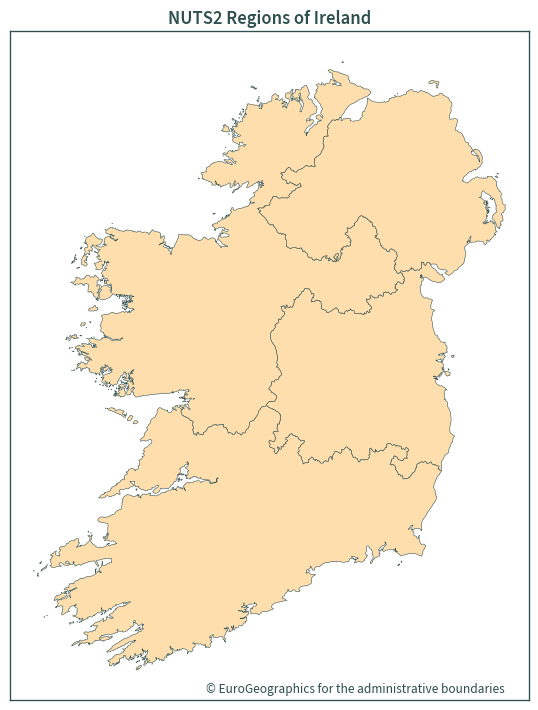

In [21]:
base = nuts2.plot(
    color="navajowhite", figsize=(7.5, 7.5),
    edgecolor="darkslategrey", linewidth=.4
)

plt.title("NUTS2 Regions of Ireland")
plt.text(
    -8.75, 51.275,
    "© EuroGeographics for the administrative boundaries"
)
plt.tick_params(labelbottom=False, labelleft=False)
plt.tight_layout()
plt.show()

## Island of Ireland boundary

In [22]:
ie = nuts2.copy()

In [23]:
ie = ie.dissolve(by="LEVL_CODE", as_index=False)

In [24]:
ie = ie[["geometry"]]

In [25]:
ie = ie.assign(NAME="Ireland")

In [26]:
DESCRIPTION = (
    "Boundary for the Island of Ireland generated using NUTS 2021 Level 1 "
    "boundaries"
)

ie = ie.assign(DESCRIPTION=DESCRIPTION)

In [27]:
ie

,geometry,NAME,DESCRIPTION
0,"MULTIPOLYGON (((-10.18425 51.60914, -10.17367 ...",Ireland,Boundary for the Island of Ireland generated u...


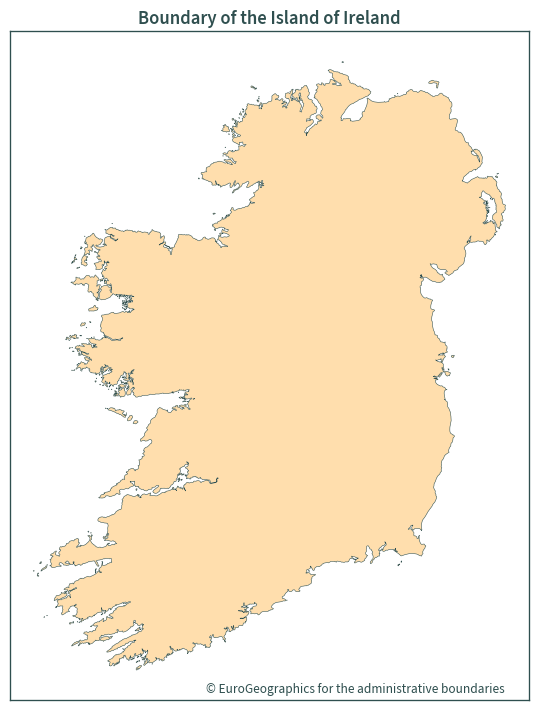

In [29]:
base = ie.plot(
    color="navajowhite", figsize=(7.5, 7.5),
    edgecolor="darkslategrey", linewidth=.4
)

plt.title("Boundary of the Island of Ireland")
plt.text(
    -8.75, 51.275,
    "© EuroGeographics for the administrative boundaries"
)
plt.tick_params(labelbottom=False, labelleft=False)
plt.tight_layout()
plt.show()

In [31]:
ie.to_file(GPKG_BOUNDARY, layer="NUTS_RG_01M_2021_4326_IE")

## Island of Ireland boundary in Irish transverse mercator

Useful for plotting

EPSG:2157

See <https://www.gov.uk/government/publications/uk-geospatial-data-standards-register/national-geospatial-data-standards-register#standards-for-coordinate-reference-systems>

In [32]:
ie.to_crs(2157, inplace=True)

In [33]:
ie

,geometry,NAME,DESCRIPTION
0,"MULTIPOLYGON (((448722.913 541888.069, 449455....",Ireland,Boundary for the Island of Ireland generated u...


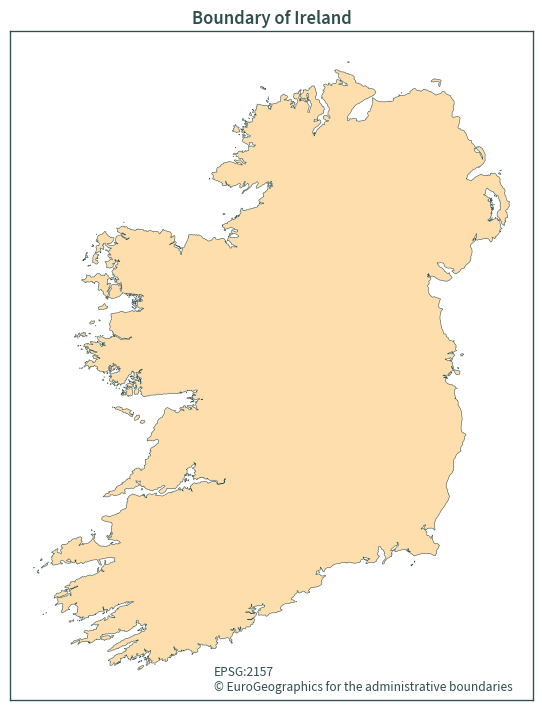

In [34]:
base = ie.plot(
    color="navajowhite", figsize=(7.5, 7.5),
    edgecolor="darkslategrey", linewidth=.4
)

plt.tick_params(labelbottom=False, labelleft=False)

plt.title("Boundary of Ireland")
plt.text(
    550000, 505000,
    str(ie.crs).upper() +
    "\n© EuroGeographics for the administrative boundaries"
)
plt.tight_layout()
plt.show()

In [35]:
ie.to_file(GPKG_BOUNDARY, layer="NUTS_RG_01M_2021_2157_IE")